In [189]:
from numpy.random import randint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from os import path, listdir
from utils import neg_scenario_from_util_matrices, count_acceptable_offers
import pandas as pd
from uuid import uuid4
from shutil import rmtree

In [212]:
n_scenarios = 2
shape = (3, 3)
lower = 0
upper = 100
constr = -1000

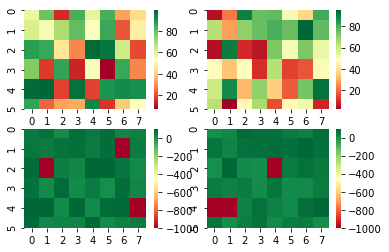

In [142]:
u_a = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
u_b = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
u_a_constr, u_b_constr = insert_constr(u_a,u_b,3)

fig, axes = plt.subplots(nrows=2,ncols=2)
sns.heatmap(u_a, ax=axes[0,0], cmap="RdYlGn")
sns.heatmap(u_b, ax=axes[0,1], cmap="RdYlGn")
sns.heatmap(u_a_constr, ax=axes[1,0], cmap="RdYlGn")
sns.heatmap(u_b_constr, ax=axes[1,1], cmap="RdYlGn")
plt.show()

In [202]:
def setup_random_scenarios(root_dir,shape,numb_of_scenarios):
    if path.exists(root_dir):
        rmtree(root_dir)
    os.mkdir(root_dir)
    
    lower = 0
    upper = 100
    
    base_a = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
    base_b = randint(lower, upper, shape[0]*shape[1]).reshape(shape)
    
    for _ in range(numb_of_scenarios):
        uuid = uuid4()
        
        scenario_dir = path.join(root_dir,str(uuid)) 
        os.mkdir(scenario_dir)
        
        for cntr in range(2*shape[0]):
            instance_dir = path.join(scenario_dir,str(cntr))
            os.mkdir(instance_dir)
            constr_a, constr_b = insert_difficult_constraints(base_a,base_b,cntr)
            np.save(path.join(instance_dir,"a.npy"),constr_a)
            np.save(path.join(instance_dir,"b.npy"),constr_b)
            
        

In [203]:
def insert_difficult_constraints(a,b,numb):
    assert a.shape == b.shape
    a_ret = a.copy()
    b_ret = b.copy()
    constr = -max(a.max(),b.max()) * 2 * shape[0] # constr is minus twice the max times N
    
    
    for ind in zip(*np.unravel_index(np.argsort(b,axis=None)[::-1][:numb],b.shape)):
        i,j = ind
        a_ret[i,j] = constr
    
    for ind in zip(*np.unravel_index(np.argsort(a,axis=None)[::-1][:numb],a.shape)):
        i,j = ind
        b_ret[i,j] = constr

    return a_ret,b_ret


In [211]:
setup_random_scenarios("./scenarios",shape,n_scenarios)

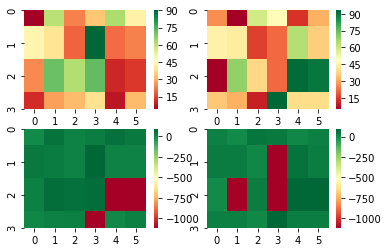

In [210]:
scenario_dir = next(iter(listdir("./scenarios")))
a_base = np.load("./scenarios/{dir}/0/a.npy".format(dir=scenario_dir))
b_base = np.load("./scenarios/{dir}/0/b.npy".format(dir=scenario_dir))
a_constr = np.load("./scenarios/{dir}/3/a.npy".format(dir=scenario_dir))
b_constr = np.load("./scenarios/{dir}/3/b.npy".format(dir=scenario_dir))

fig, axes = plt.subplots(nrows=2,ncols=2)
sns.heatmap(a_base, ax=axes[0,0], cmap="RdYlGn")
sns.heatmap(b_base, ax=axes[0,1], cmap="RdYlGn")
sns.heatmap(a_constr, ax=axes[1,0], cmap="RdYlGn")
sns.heatmap(b_constr, ax=axes[1,1], cmap="RdYlGn")
plt.show()

In [225]:
results = pd.read_csv("../results/rand_results.csv")
results.head(10)

,id,constr_count,rho_a,rho_b,a_accepts,b_accepts,both_accept,p_a,p_b,p_ap_b,success,total_message_count,n_constraints,n_constraints_discovered,n_constraints_opponent_discovered,strat,utility,opponent_utility,opponent_strat
0,/home/sam/Documents/code/work/pyneg/src/scenar...,0,0.000000,0.000000,256,256,256,1.000000,1.000000,1.000000,True,2,0,0,0,Random,57.25,42.25,Random
1,/home/sam/Documents/code/work/pyneg/src/scenar...,1,0.555556,0.000000,126,192,79,0.626984,0.411458,0.257978,True,3,1,0,0,Random,48.25,56.25,Random
2,/home/sam/Documents/code/work/pyneg/src/scenar...,0,0.000000,0.000000,256,256,256,1.000000,1.000000,1.000000,True,2,0,0,0,Constrained,25.25,54.00,Constrained
3,/home/sam/Documents/code/work/pyneg/src/scenar...,0,0.666667,0.555556,117,192,90,0.769231,0.468750,0.360577,True,4,0,0,0,Constrained,59.00,63.75,Constrained
4,/home/sam/Documents/code/work/pyneg/src/scenar...,2,0.222222,0.555556,144,122,86,0.597222,0.704918,0.420993,True,2,2,0,0,Random,27.00,60.25,Random
5,/home/sam/Documents/code/work/pyneg/src/scenar...,0,0.777778,0.555556,47,192,37,0.787234,0.192708,0.151707,True,2,0,0,0,Random,70.25,57.00,Random
6,/home/sam/Documents/code/work/pyneg/src/scenar...,4,0.666667,0.000000,29,72,9,0.310345,0.125000,0.038793,True,2,4,0,0,Random,52.50,38.25,Random
7,/home/sam/Documents/code/work/pyneg/src/scenar...,4,0.111111,0.333333,64,72,36,0.562500,0.500000,0.281250,True,3,4,1,0,Constrained,29.50,48.75,Constrained
8,/home/sam/Documents/code/work/pyneg/src/scenar...,5,0.000000,0.666667,48,32,8,0.166667,0.250000,0.041667,True,3,5,1,0,Constrained,29.50,48.75,Constrained
9,/home/sam/Documents/code/work/pyneg/src/scenar...,0,0.888889,0.777778,11,62,2,0.181818,0.032258,0.005865,True,2,0,0,0,Random,71.00,77.50,Random


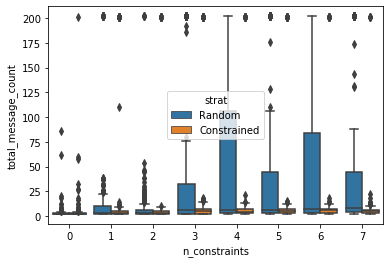

In [237]:
sns.boxplot(x="n_constraints", y="total_message_count", hue="strat", data=results)

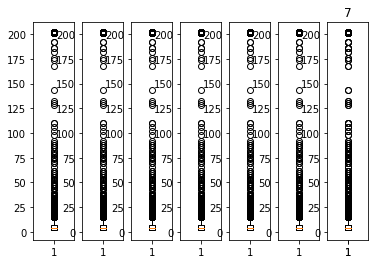

In [232]:
# n_constr = results["n_constraints"].max()
# fig, axes = plt.subplots(nrows=1,ncols=n_constr)
# for name, group in results.groupby("n_constraints"):
#     axes[int(name)-1].boxplot(results["total_message_count"])
#     plt.title(name)
# plt.show()